해야 할 것: 교통수단 이용(지하철 + 자가 + 버스 이용률) 중 지하철이 차지하는 비율을 생각하여 지하철 비율을 계산하기 일단 사용해야할 것은 자가인 경우 입출입 자가 서비스에 관련되어서 보고 지하철인 경우 입출입....근데 이건 좀 고민해봐야할 것 같고 버스 같은 경우는 이제 데이터 받아와서 사용하는 것으로 그럼 각 요일 별 평균 이용자수를 수집한 상태에서 비율로 계산하고 해당 비율의 총 합의 평균을 계산할지 아니면 시각화해서 조사할지를 고민 해봐야 할 것 같음 


In [643]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## 1. 자가 데이터

In [644]:
df = pd.read_csv('C:/Users/82104/Desktop/체육/기상정보활용올림픽공원이용분석정보.csv')
df

,MESURE_DE,MESURE_WKDAY_NM,WKEND_AT,MESURE_HOUR,CRRSPND_TIME_ISE_ENTVHCL_CO,CRRSPND_TIME_ISE_LVVHCL_CO,CRRSPND_TIME_ISE_N2GT_LVVHCL_CO,CRRSPND_TIME_ISE_W1GT_LVVHCL_CO,CRRSPND_TIME_ISE_W2GT_LVVHCL_CO,CRRSPND_TIME_ISE_S2GT_LVVHCL_CO,...,CRRSPND_TIME_ISE_S4GT_LVVHCL_CO,CRRSPND_TIME_ISE_E2GT_LVVHCL_CO,MESURE_TP_VALUE,PRCPT_STLE_CD,PRCPT_STLE_NM,TIME_ISE_PRCPTTN_QY,MESURE_HD_VALUE,MESURE_PBLMRL_VALUE,MESURE_WD_VALUE,WD_FLAG_NM
0,20120107,토요일,Y,0,0,0,0,0,0,0,...,0,0,-8.3,0,없음,0.0,71.0,0.5,0.0,N
1,20120107,토요일,Y,1,0,0,0,0,0,0,...,0,0,-5.8,0,없음,0.0,62.0,0.5,0.0,N
2,20120107,토요일,Y,2,0,0,0,0,0,0,...,0,0,-3.7,0,없음,0.0,53.0,0.9,0.0,N
3,20120107,토요일,Y,3,0,0,0,0,0,0,...,0,0,-1.2,0,없음,0.0,45.0,0.9,0.0,N
4,20120107,토요일,Y,4,0,0,0,0,0,0,...,0,0,0.3,0,없음,0.0,37.0,0.5,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85152,20211026,화요일,N,21,56,314,131,0,0,38,...,27,113,12.0,0,없음,0.0,84.0,0.9,69.0,ENE
85153,20211026,화요일,N,22,10,203,67,0,0,30,...,20,83,11.4,0,없음,0.0,89.0,0.5,101.0,E
85154,20211026,화요일,N,23,1,27,2,0,0,0,...,2,23,10.7,0,없음,0.0,92.0,0.5,90.0,E
85155,20211027,수요일,N,0,9,0,0,0,0,0,...,0,0,10.8,0,없음,0.0,92.0,0.4,90.0,E


### 입차/출차

#### 공연 전 3시간 , 입차 정보 후 1시간 출차 량 => 총 공연 자가 이용량`

In [645]:
df_17 = df.iloc[43688:]
df_17

,MESURE_DE,MESURE_WKDAY_NM,WKEND_AT,MESURE_HOUR,CRRSPND_TIME_ISE_ENTVHCL_CO,CRRSPND_TIME_ISE_LVVHCL_CO,CRRSPND_TIME_ISE_N2GT_LVVHCL_CO,CRRSPND_TIME_ISE_W1GT_LVVHCL_CO,CRRSPND_TIME_ISE_W2GT_LVVHCL_CO,CRRSPND_TIME_ISE_S2GT_LVVHCL_CO,...,CRRSPND_TIME_ISE_S4GT_LVVHCL_CO,CRRSPND_TIME_ISE_E2GT_LVVHCL_CO,MESURE_TP_VALUE,PRCPT_STLE_CD,PRCPT_STLE_NM,TIME_ISE_PRCPTTN_QY,MESURE_HD_VALUE,MESURE_PBLMRL_VALUE,MESURE_WD_VALUE,WD_FLAG_NM
43688,20170101,일요일,Y,0,12,2,0,0,1,1,...,0,0,-0.2,0,없음,0.0,84.0,0.4,104.0,ESE
43689,20170101,일요일,Y,1,24,9,4,0,0,1,...,0,4,0.8,0,없음,0.0,81.0,0.4,104.0,ESE
43690,20170101,일요일,Y,2,15,8,4,0,0,1,...,0,3,2.4,0,없음,0.0,75.0,0.5,53.0,NE
43691,20170101,일요일,Y,3,15,11,8,0,0,1,...,0,2,4.3,0,없음,0.0,69.0,0.3,108.0,ESE
43692,20170101,일요일,Y,4,28,11,5,0,0,2,...,0,4,5.6,0,없음,0.0,66.0,0.3,45.0,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85152,20211026,화요일,N,21,56,314,131,0,0,38,...,27,113,12.0,0,없음,0.0,84.0,0.9,69.0,ENE
85153,20211026,화요일,N,22,10,203,67,0,0,30,...,20,83,11.4,0,없음,0.0,89.0,0.5,101.0,E
85154,20211026,화요일,N,23,1,27,2,0,0,0,...,2,23,10.7,0,없음,0.0,92.0,0.5,90.0,E
85155,20211027,수요일,N,0,9,0,0,0,0,0,...,0,0,10.8,0,없음,0.0,92.0,0.4,90.0,E


In [646]:
df_17.reset_index(drop=True, inplace=True)
df_17

,MESURE_DE,MESURE_WKDAY_NM,WKEND_AT,MESURE_HOUR,CRRSPND_TIME_ISE_ENTVHCL_CO,CRRSPND_TIME_ISE_LVVHCL_CO,CRRSPND_TIME_ISE_N2GT_LVVHCL_CO,CRRSPND_TIME_ISE_W1GT_LVVHCL_CO,CRRSPND_TIME_ISE_W2GT_LVVHCL_CO,CRRSPND_TIME_ISE_S2GT_LVVHCL_CO,...,CRRSPND_TIME_ISE_S4GT_LVVHCL_CO,CRRSPND_TIME_ISE_E2GT_LVVHCL_CO,MESURE_TP_VALUE,PRCPT_STLE_CD,PRCPT_STLE_NM,TIME_ISE_PRCPTTN_QY,MESURE_HD_VALUE,MESURE_PBLMRL_VALUE,MESURE_WD_VALUE,WD_FLAG_NM
0,20170101,일요일,Y,0,12,2,0,0,1,1,...,0,0,-0.2,0,없음,0.0,84.0,0.4,104.0,ESE
1,20170101,일요일,Y,1,24,9,4,0,0,1,...,0,4,0.8,0,없음,0.0,81.0,0.4,104.0,ESE
2,20170101,일요일,Y,2,15,8,4,0,0,1,...,0,3,2.4,0,없음,0.0,75.0,0.5,53.0,NE
3,20170101,일요일,Y,3,15,11,8,0,0,1,...,0,2,4.3,0,없음,0.0,69.0,0.3,108.0,ESE
4,20170101,일요일,Y,4,28,11,5,0,0,2,...,0,4,5.6,0,없음,0.0,66.0,0.3,45.0,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41464,20211026,화요일,N,21,56,314,131,0,0,38,...,27,113,12.0,0,없음,0.0,84.0,0.9,69.0,ENE
41465,20211026,화요일,N,22,10,203,67,0,0,30,...,20,83,11.4,0,없음,0.0,89.0,0.5,101.0,E
41466,20211026,화요일,N,23,1,27,2,0,0,0,...,2,23,10.7,0,없음,0.0,92.0,0.5,90.0,E
41467,20211027,수요일,N,0,9,0,0,0,0,0,...,0,0,10.8,0,없음,0.0,92.0,0.4,90.0,E


## Data Explore

### Column 정리
- MESURE_DE : 날짜
- MSEURE_WKDAY_NM: 요일
- WKEND_AT: 주말 표시 여부
- MESURE_HOURT: 시간
- CRRSPND_TIME_ISE_ENTVHCL_CO: 해당 시간 내 입차량 
- CRRSPND_TIME_ISE_LVVHCL_CO: 해당 시간 내 출차량

In [647]:
df_17[['CRRSPND_TIME_ISE_LVVHCL_CO', 'CRRSPND_TIME_ISE_N2GT_LVVHCL_CO','CRRSPND_TIME_ISE_W1GT_LVVHCL_CO','CRRSPND_TIME_ISE_W2GT_LVVHCL_CO',
      'CRRSPND_TIME_ISE_S2GT_LVVHCL_CO','CRRSPND_TIME_ISE_S3GT_LVVHCL_CO','CRRSPND_TIME_ISE_S4GT_LVVHCL_CO','CRRSPND_TIME_ISE_E2GT_LVVHCL_CO']]

,CRRSPND_TIME_ISE_LVVHCL_CO,CRRSPND_TIME_ISE_N2GT_LVVHCL_CO,CRRSPND_TIME_ISE_W1GT_LVVHCL_CO,CRRSPND_TIME_ISE_W2GT_LVVHCL_CO,CRRSPND_TIME_ISE_S2GT_LVVHCL_CO,CRRSPND_TIME_ISE_S3GT_LVVHCL_CO,CRRSPND_TIME_ISE_S4GT_LVVHCL_CO,CRRSPND_TIME_ISE_E2GT_LVVHCL_CO
0,2,0,0,1,1,0,0,0
1,9,4,0,0,1,0,0,4
2,8,4,0,0,1,0,0,3
3,11,8,0,0,1,0,0,2
4,11,5,0,0,2,0,0,4
...,...,...,...,...,...,...,...,...
41464,314,131,0,0,38,5,27,113
41465,203,67,0,0,30,3,20,83
41466,27,2,0,0,0,0,2,23
41467,0,0,0,0,0,0,0,0


- 나머지 칼럼 합이 해당시간 내 출차 수 

In [648]:
re = df_17[['MESURE_DE','MESURE_WKDAY_NM','MESURE_HOUR','CRRSPND_TIME_ISE_ENTVHCL_CO','CRRSPND_TIME_ISE_LVVHCL_CO']]
re

,MESURE_DE,MESURE_WKDAY_NM,MESURE_HOUR,CRRSPND_TIME_ISE_ENTVHCL_CO,CRRSPND_TIME_ISE_LVVHCL_CO
0,20170101,일요일,0,12,2
1,20170101,일요일,1,24,9
2,20170101,일요일,2,15,8
3,20170101,일요일,3,15,11
4,20170101,일요일,4,28,11
...,...,...,...,...,...
41464,20211026,화요일,21,56,314
41465,20211026,화요일,22,10,203
41466,20211026,화요일,23,1,27
41467,20211027,수요일,0,9,0


In [649]:
re.columns = ['date','day','hour','entvhcl','leavhcl']
re

,date,day,hour,entvhcl,leavhcl
0,20170101,일요일,0,12,2
1,20170101,일요일,1,24,9
2,20170101,일요일,2,15,8
3,20170101,일요일,3,15,11
4,20170101,일요일,4,28,11
...,...,...,...,...,...
41464,20211026,화요일,21,56,314
41465,20211026,화요일,22,10,203
41466,20211026,화요일,23,1,27
41467,20211027,수요일,0,9,0


In [650]:
org = re.copy()
org

,date,day,hour,entvhcl,leavhcl
0,20170101,일요일,0,12,2
1,20170101,일요일,1,24,9
2,20170101,일요일,2,15,8
3,20170101,일요일,3,15,11
4,20170101,일요일,4,28,11
...,...,...,...,...,...
41464,20211026,화요일,21,56,314
41465,20211026,화요일,22,10,203
41466,20211026,화요일,23,1,27
41467,20211027,수요일,0,9,0


In [651]:
re.isnull().sum() #특정열의 결측치 자체는 존재 x

date       0
day        0
hour       0
entvhcl    0
leavhcl    0
dtype: int64

In [652]:
re['day'].unique() 

array(['일요일', '월요일', '화요일', '수요일', '목요일', '금요일', '토요일'], dtype=object)

In [653]:
re['day'].value_counts() # 일요일, 수요일, 토요일, 목요일 

화요일    5954
월요일    5930
금요일    5930
일요일    5929
수요일    5918
토요일    5907
목요일    5901
Name: day, dtype: int64

### 1. 일별 

In [654]:
re['ent_cumsum'] = re.groupby((re.hour==0).cumsum()).entvhcl.cumsum() #0일떄가지 누적 즉, 0-23까지의 누적합하고 다시 누적합 초기화

C:\Users\82104\AppData\Local\Temp/ipykernel_25864/995029483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re['ent_cumsum'] = re.groupby((re.hour==0).cumsum()).entvhcl.cumsum() #0일떄가지 누적 즉, 0-23까지의 누적합하고 다시 누적합 초기화


In [655]:
re['lea_cumsum'] = re.groupby((re.hour==0).cumsum()).leavhcl.cumsum()

C:\Users\82104\AppData\Local\Temp/ipykernel_25864/2314780039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re['lea_cumsum'] = re.groupby((re.hour==0).cumsum()).leavhcl.cumsum()


In [656]:
result = re[re['hour']==23]
result

,date,day,hour,entvhcl,leavhcl,ent_cumsum,lea_cumsum
23,20170101,일요일,23,0,20,4010,4010
47,20170102,월요일,23,0,121,4751,4751
71,20170103,화요일,23,2,611,5549,5549
95,20170104,수요일,23,2,160,4887,4887
119,20170105,목요일,23,0,104,5427,5427
...,...,...,...,...,...,...,...
41384,20211022,금요일,23,2,84,2287,3180
41405,20211023,토요일,23,5,32,5766,5802
41423,20211024,일요일,23,1,26,4486,4990
41442,20211025,월요일,23,2,28,3194,4084


In [657]:
result.reset_index(drop=True, inplace=True)
result.drop(columns=['entvhcl','leavhcl'],inplace=True)
result

C:\Users\82104\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,date,day,hour,ent_cumsum,lea_cumsum
0,20170101,일요일,23,4010,4010
1,20170102,월요일,23,4751,4751
2,20170103,화요일,23,5549,5549
3,20170104,수요일,23,4887,4887
4,20170105,목요일,23,5427,5427
...,...,...,...,...,...
1726,20211022,금요일,23,2287,3180
1727,20211023,토요일,23,5766,5802
1728,20211024,일요일,23,4486,4990
1729,20211025,월요일,23,3194,4084


In [658]:
result[result['ent_cumsum']!=result['lea_cumsum']] # 출입차량 다른 것 총 141columns

,date,day,hour,ent_cumsum,lea_cumsum
716,20181218,화요일,23,3226,3586
717,20181219,수요일,23,4022,3442
718,20181222,토요일,23,4227,3403
719,20181223,일요일,23,2277,2826
720,20181224,월요일,23,4510,5097
...,...,...,...,...,...
1723,20211018,월요일,23,4083,3592
1726,20211022,금요일,23,2287,3180
1727,20211023,토요일,23,5766,5802
1728,20211024,일요일,23,4486,4990


In [659]:
result.isnull().sum()

date          0
day           0
hour          0
ent_cumsum    0
lea_cumsum    0
dtype: int64

In [660]:
result['day'].value_counts() # 23시 기준 음.. 중간 중간 누락되어 있는 값들 존재함 

월요일    249
화요일    248
수요일    248
금요일    248
토요일    247
목요일    246
일요일    245
Name: day, dtype: int64

In [665]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1731 non-null   int64 
 1   day         1731 non-null   object
 2   hour        1731 non-null   int64 
 3   ent_cumsum  1731 non-null   int64 
 4   lea_cumsum  1731 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 67.7+ KB


### 2. 요일별

#### 1. 일요일

In [661]:
is_sun = org[org['day'] == '일요일']
is_sun

,date,day,hour,entvhcl,leavhcl
0,20170101,일요일,0,12,2
1,20170101,일요일,1,24,9
2,20170101,일요일,2,15,8
3,20170101,일요일,3,15,11
4,20170101,일요일,4,28,11
...,...,...,...,...,...
41419,20211024,일요일,19,83,150
41420,20211024,일요일,20,71,219
41421,20211024,일요일,21,22,331
41422,20211024,일요일,22,10,67


In [662]:
sun_ent = is_sun[(is_sun['hour']== 14) | (is_sun['hour']== 15) | (is_sun['hour']== 16)]
sun_ent

,date,day,hour,entvhcl,leavhcl
14,20170101,일요일,14,303,222
15,20170101,일요일,15,283,294
16,20170101,일요일,16,196,409
182,20170108,일요일,14,370,289
183,20170108,일요일,15,348,515
...,...,...,...,...,...
41264,20211017,일요일,15,588,552
41265,20211017,일요일,16,423,693
41415,20211024,일요일,14,908,521
41416,20211024,일요일,15,876,792


- 공연시간전 3시간은 입차량, 후 1시간은 출차량

In [663]:
sun_lea = is_sun[is_sun['hour']== 20]
sun_lea.reset_index(drop=True, inplace=True)
sun_lea

,date,day,hour,entvhcl,leavhcl
0,20170101,일요일,20,22,111
1,20170108,일요일,20,25,167
2,20170115,일요일,20,19,152
3,20170122,일요일,20,24,589
4,20170129,일요일,20,34,94
...,...,...,...,...,...
241,20210926,일요일,20,120,280
242,20211003,일요일,20,97,247
243,20211010,일요일,20,49,228
244,20211017,일요일,20,43,96


In [664]:
sun_ent['ent_cumsum'] = sun_ent.groupby((sun_ent.hour==14).cumsum()).entvhcl.cumsum()
sun_ent

C:\Users\82104\AppData\Local\Temp/ipykernel_25864/1547672077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sun_ent['ent_cumsum'] = sun_ent.groupby((sun_ent.hour==14).cumsum()).entvhcl.cumsum()


,date,day,hour,entvhcl,leavhcl,ent_cumsum
14,20170101,일요일,14,303,222,303
15,20170101,일요일,15,283,294,586
16,20170101,일요일,16,196,409,782
182,20170108,일요일,14,370,289,370
183,20170108,일요일,15,348,515,718
...,...,...,...,...,...,...
41264,20211017,일요일,15,588,552,1305
41265,20211017,일요일,16,423,693,1728
41415,20211024,일요일,14,908,521,908
41416,20211024,일요일,15,876,792,1784


In [177]:
sun_result= sun_ent[sun_ent['hour'] == 16]
sun_result.reset_index(drop=True, inplace=True)
sun_result

,date,day,hour,entvhcl,leavhcl,ent_cumsum
0,20170101,일요일,16,196,409,782
1,20170108,일요일,16,229,466,947
2,20170115,일요일,16,137,314,628
3,20170122,일요일,16,273,304,855
4,20170129,일요일,16,120,141,415
...,...,...,...,...,...,...
243,20210926,일요일,16,677,809,2294
244,20211003,일요일,16,755,815,2500
245,20211010,일요일,16,193,213,775
246,20211017,일요일,16,423,693,1728


In [284]:
error = []
for i in range(228,245):
    if sun_lea['date'].iloc[i] != sun_result['date'].iloc[i+2]:
        error.append(sun_lea.iloc[i])

In [204]:
sun_lea.iloc[103]

date       20181223
day             일요일
hour             20
entvhcl          48
leavhcl         754
Name: 103, dtype: object

In [283]:
sun_result.iloc[103]  #2018 12 23 누락

date          20181230
day                일요일
hour                16
entvhcl            977
leavhcl            420
ent_cumsum        2074
Name: 103, dtype: object

In [251]:
sun_lea.iloc[124] # 2019 05 12 날짜 누락 

date       20190526
day             일요일
hour             20
entvhcl         187
leavhcl        1062
Name: 124, dtype: object

In [252]:
sun_result.iloc[124] 

date          20190526
day                일요일
hour                16
entvhcl            639
leavhcl            546
ent_cumsum        1969
Name: 124, dtype: object

In [261]:
sun_lea.iloc[224] # 2021 4 25 데이터 누락 

date       20210502
day             일요일
hour             20
entvhcl          59
leavhcl         172
Name: 224, dtype: object

In [262]:
sun_result.iloc[225]

date          20210502
day                일요일
hour                16
entvhcl            583
leavhcl            771
ent_cumsum        2149
Name: 225, dtype: object

In [279]:
sun_lea.iloc[228] # 2021 5 21 데이터 누락 

date       20210606
day             일요일
hour             20
entvhcl         119
leavhcl         278
Name: 228, dtype: object

In [281]:
sun_result.iloc[230]

date          20210606
day                일요일
hour                16
entvhcl            480
leavhcl            539
ent_cumsum        1491
Name: 230, dtype: object

In [285]:
pd.DataFrame(error)

""


- sun_lea 누락 날짜: 2019 05 12 , 2021 4 25 , 2021 5 21
- sun_result 누락 날짜: 2018 12 23 

### 2. 토요일

In [287]:
is_sat = org[org['day'] == '토요일']
is_sat

,date,day,hour,entvhcl,leavhcl
144,20170107,토요일,0,3,0
145,20170107,토요일,1,2,0
146,20170107,토요일,2,1,0
147,20170107,토요일,3,4,1
148,20170107,토요일,4,3,0
...,...,...,...,...,...
41401,20211023,토요일,19,82,192
41402,20211023,토요일,20,87,161
41403,20211023,토요일,21,44,485
41404,20211023,토요일,22,8,138


In [290]:
sat_ent = is_sat[(is_sat['hour']== 15) | (is_sat['hour']== 16) | (is_sat['hour']== 17)]
sat_ent

,date,day,hour,entvhcl,leavhcl
159,20170107,토요일,15,586,535
160,20170107,토요일,16,414,680
161,20170107,토요일,17,201,903
327,20170114,토요일,15,239,441
328,20170114,토요일,16,134,350
...,...,...,...,...,...
41242,20211016,토요일,16,391,590
41243,20211016,토요일,17,264,502
41397,20211023,토요일,15,750,552
41398,20211023,토요일,16,630,874


In [359]:
sat_lea = is_sat[is_sat['hour']== 21]
sat_lea.reset_index(drop=True, inplace=True)
sat_lea

,date,day,hour,entvhcl,leavhcl
0,20170107,토요일,21,16,217
1,20170114,토요일,21,11,123
2,20170121,토요일,21,12,261
3,20170128,토요일,21,45,74
4,20170204,토요일,21,76,223
...,...,...,...,...,...
239,20210918,토요일,21,50,460
240,20211002,토요일,21,62,185
241,20211009,토요일,21,63,274
242,20211016,토요일,21,42,311


In [413]:
sat_ent['ent_cumsum'] = sat_ent.groupby((sat_ent.hour==15).cumsum()).entvhcl.cumsum()
sat_ent

C:\Users\82104\AppData\Local\Temp/ipykernel_25864/3986268901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_ent['ent_cumsum'] = sat_ent.groupby((sat_ent.hour==15).cumsum()).entvhcl.cumsum()


,date,day,hour,entvhcl,leavhcl,ent_cumsum
159,20170107,토요일,15,586,535,586
160,20170107,토요일,16,414,680,1000
161,20170107,토요일,17,201,903,1201
327,20170114,토요일,15,239,441,239
328,20170114,토요일,16,134,350,373
...,...,...,...,...,...,...
41242,20211016,토요일,16,391,590,896
41243,20211016,토요일,17,264,502,1160
41397,20211023,토요일,15,750,552,750
41398,20211023,토요일,16,630,874,1380


In [668]:
sat_result= sat_ent[sat_ent['hour'] == 17]
sat_result.reset_index(drop=True, inplace=True)
sat_result

,date,day,hour,entvhcl,leavhcl,ent_cumsum
0,20170107,토요일,17,201,903,1201
1,20170114,토요일,17,141,377,514
2,20170121,토요일,17,99,378,654
3,20170128,토요일,17,119,198,478
4,20170204,토요일,17,205,771,974
...,...,...,...,...,...,...
244,20210925,토요일,17,389,696,1359
245,20211002,토요일,17,432,833,1781
246,20211009,토요일,17,490,832,1904
247,20211016,토요일,17,264,502,1160


In [402]:
error_sat = []
for i in range(232,244):
    if sat_lea['date'].iloc[i] != sat_result['date'].iloc[i+4]:
        error_sat.append(sat_lea.iloc[i])

In [403]:
pd.DataFrame(error_sat)

,date,day,hour,entvhcl,leavhcl
240,20211002,토요일,21,62,185
241,20211009,토요일,21,63,274
242,20211016,토요일,21,42,311
243,20211023,토요일,21,44,485


In [411]:
sat_lea.iloc[239]

date       20210918
day             토요일
hour             21
entvhcl          50
leavhcl         460
Name: 239, dtype: object

In [394]:
sat_result.iloc[199]

date          20201031
day                토요일
hour                17
entvhcl            275
leavhcl            962
ent_cumsum      272356
Name: 199, dtype: object

In [412]:
# 2018/12/22, 2020/2/15, 2020/10/31, 2021/7/10, 2021/9/25 누락

### 3. 금요일

In [355]:
is_fri = org[org['day'] == '금요일']
is_fri

,date,day,hour,entvhcl,leavhcl
120,20170106,금요일,0,4,1
121,20170106,금요일,1,0,0
122,20170106,금요일,2,5,0
123,20170106,금요일,3,1,1
124,20170106,금요일,4,5,0
...,...,...,...,...,...
41380,20211022,금요일,19,189,283
41381,20211022,금요일,20,119,260
41382,20211022,금요일,21,44,262
41383,20211022,금요일,22,11,183


In [356]:
fri_ent = is_fri[(is_fri['hour']== 16) | (is_fri['hour']== 17) | (is_fri['hour']== 18)]
fri_ent

,date,day,hour,entvhcl,leavhcl
136,20170106,금요일,16,225,432
137,20170106,금요일,17,196,483
138,20170106,금요일,18,220,565
304,20170113,금요일,16,175,337
305,20170113,금요일,17,186,411
...,...,...,...,...,...
41219,20211015,금요일,16,284,423
41220,20211015,금요일,17,323,509
41221,20211015,금요일,18,249,600
41378,20211022,금요일,16,221,399


In [416]:
fri_lea = is_fri[is_fri['hour']== 22]
fri_lea.reset_index(drop=True, inplace=True)
fri_lea

,date,day,hour,entvhcl,leavhcl
0,20170106,금요일,22,17,235
1,20170113,금요일,22,13,229
2,20170120,금요일,22,15,174
3,20170127,금요일,22,8,41
4,20170203,금요일,22,38,235
...,...,...,...,...,...
243,20210924,금요일,22,14,207
244,20211001,금요일,22,7,242
245,20211008,금요일,22,12,340
246,20211015,금요일,22,7,338


In [420]:
fri_ent['ent_cumsum'] = fri_ent.groupby((fri_ent.hour==16).cumsum()).entvhcl.cumsum()
fri_ent

C:\Users\82104\AppData\Local\Temp/ipykernel_25864/1184519726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fri_ent['ent_cumsum'] = fri_ent.groupby((fri_ent.hour==16).cumsum()).entvhcl.cumsum()


,date,day,hour,entvhcl,leavhcl,ent_cumsum
136,20170106,금요일,16,225,432,225
137,20170106,금요일,17,196,483,421
138,20170106,금요일,18,220,565,641
304,20170113,금요일,16,175,337,175
305,20170113,금요일,17,186,411,361
...,...,...,...,...,...,...
41219,20211015,금요일,16,284,423,284
41220,20211015,금요일,17,323,509,607
41221,20211015,금요일,18,249,600,856
41378,20211022,금요일,16,221,399,221


In [423]:
fri_result= fri_ent[fri_ent['hour'] == 18]
fri_result.reset_index(drop=True, inplace=True)
fri_result.drop(columns=['leavhcl'])

,date,day,hour,entvhcl,leavhcl,ent_cumsum
0,20170106,금요일,18,220,565,641
1,20170113,금요일,18,232,606,593
2,20170120,금요일,18,172,531,563
3,20170127,금요일,18,78,130,293
4,20170203,금요일,18,269,710,743
...,...,...,...,...,...,...
243,20210924,금요일,18,261,721,808
244,20211001,금요일,18,198,704,744
245,20211008,금요일,18,203,510,549
246,20211015,금요일,18,249,600,856


In [442]:
error_fri = []
for i in range(103,247):
    if fri_lea['date'].iloc[i+1] != fri_result['date'].iloc[i]:
        error_fri.append(fri_lea.iloc[i])

In [443]:
pd.DataFrame(error_fri)

,date,day,hour,entvhcl,leavhcl
240,20210820,금요일,22,14,188
241,20210910,금요일,22,19,579
242,20210917,금요일,22,10,245
243,20210924,금요일,22,14,207
244,20211001,금요일,22,7,242
245,20211008,금요일,22,12,340
246,20211015,금요일,22,7,338


In [449]:
fri_lea.iloc[240] #2021 8 27 누락

date       20210820
day             금요일
hour             22
entvhcl          14
leavhcl         188
Name: 240, dtype: object

In [448]:
fri_result.iloc[240] #2018 12 21

date          20210827
day                금요일
hour                18
entvhcl            195
leavhcl            609
ent_cumsum         556
Name: 240, dtype: object

### 4. 월-목

In [450]:
is_mon_to_thur = org[(org['day'] == '월요일')|(org['day'] == '화요일')|(org['day'] == '수요일')|(org['day'] == '목요일')]
is_mon_to_thur

,date,day,hour,entvhcl,leavhcl
24,20170102,월요일,0,8,0
25,20170102,월요일,1,0,3
26,20170102,월요일,2,1,0
27,20170102,월요일,3,0,1
28,20170102,월요일,4,5,0
...,...,...,...,...,...
41464,20211026,화요일,21,56,314
41465,20211026,화요일,22,10,203
41466,20211026,화요일,23,1,27
41467,20211027,수요일,0,9,0


In [451]:
mon_to_thur_ent = is_mon_to_thur[(is_mon_to_thur['hour']== 16) | (is_mon_to_thur['hour']== 17) | (is_mon_to_thur['hour']== 18)]
mon_to_thur_ent

,date,day,hour,entvhcl,leavhcl
40,20170102,월요일,16,189,348
41,20170102,월요일,17,163,372
42,20170102,월요일,18,211,625
64,20170103,화요일,16,239,391
65,20170103,화요일,17,243,422
...,...,...,...,...,...
41436,20211025,월요일,17,213,517
41437,20211025,월요일,18,175,675
41459,20211026,화요일,16,300,475
41460,20211026,화요일,17,222,559


In [452]:
mon_to_thur_lea = is_mon_to_thur[is_mon_to_thur['hour']== 22]
mon_to_thur_lea.reset_index(drop=True, inplace=True)
mon_to_thur_lea

,date,day,hour,entvhcl,leavhcl
0,20170102,월요일,22,13,212
1,20170103,화요일,22,21,249
2,20170104,수요일,22,29,261
3,20170105,목요일,22,15,224
4,20170109,월요일,22,12,207
...,...,...,...,...,...
989,20211019,화요일,22,2,163
990,20211020,수요일,22,10,159
991,20211021,목요일,22,8,175
992,20211025,월요일,22,10,189


In [453]:
mon_to_thur_ent['ent_cumsum'] = mon_to_thur_ent.groupby((mon_to_thur_ent.hour==16).cumsum()).entvhcl.cumsum()
mon_to_thur_ent

C:\Users\82104\AppData\Local\Temp/ipykernel_25864/2261067273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon_to_thur_ent['ent_cumsum'] = mon_to_thur_ent.groupby((mon_to_thur_ent.hour==16).cumsum()).entvhcl.cumsum()


,date,day,hour,entvhcl,leavhcl,ent_cumsum
40,20170102,월요일,16,189,348,189
41,20170102,월요일,17,163,372,352
42,20170102,월요일,18,211,625,563
64,20170103,화요일,16,239,391,239
65,20170103,화요일,17,243,422,482
...,...,...,...,...,...,...
41436,20211025,월요일,17,213,517,470
41437,20211025,월요일,18,175,675,645
41459,20211026,화요일,16,300,475,300
41460,20211026,화요일,17,222,559,522


In [455]:
mon_to_thur_result= mon_to_thur_ent[mon_to_thur_ent['hour'] == 18]
mon_to_thur_result.reset_index(drop=True, inplace=True)
mon_to_thur_result

,date,day,hour,entvhcl,leavhcl,ent_cumsum
0,20170102,월요일,18,211,625,563
1,20170103,화요일,18,311,626,793
2,20170104,수요일,18,232,595,624
3,20170105,목요일,18,234,627,592
4,20170109,월요일,18,186,629,552
...,...,...,...,...,...,...
986,20211019,화요일,18,200,644,636
987,20211020,수요일,18,165,658,629
988,20211021,목요일,18,182,605,619
989,20211025,월요일,18,175,675,645


In [606]:
error_mon_to_thur = [] # 수작업 error 처리.. 
for i in range(983,989):
    if mon_to_thur_lea['date'].iloc[i] != mon_to_thur_result['date'].iloc[i-3]:
        error_mon_to_thur.append(mon_to_thur_lea.iloc[i])

In [607]:
pd.DataFrame(error_mon_to_thur)

,date,day,hour,entvhcl,leavhcl
987,20211014,목요일,22,8,212
988,20211018,월요일,22,11,151


In [636]:
mon_to_thur_lea.iloc[990]

date       20211020
day             수요일
hour             22
entvhcl          10
leavhcl         159
Name: 990, dtype: object

#### 누락된 요일 찾음 => 어떤 방식으로 처리해야할지 논의 필요

### 시각화

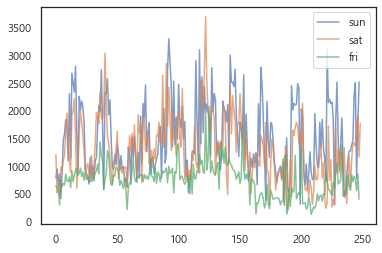

In [713]:
plt.plot(sun_result['ent_cumsum'],alpha = 0.7,label='sun')
plt.plot(sat_result['ent_cumsum'],alpha = 0.7,label='sat')
plt.plot(fri_result['ent_cumsum'],alpha = 0.7,label='fri')
plt.legend()
plt.show()

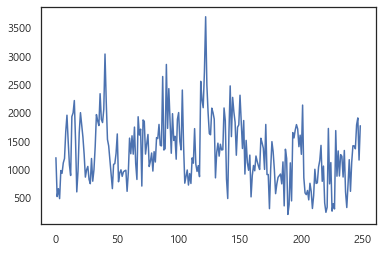

In [712]:
plt.plot(sat_result['ent_cumsum'])

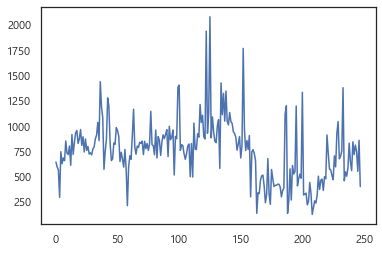

In [699]:
plt.plot(fri_result['ent_cumsum'])

In [700]:
import seaborn as sns

In [701]:
mon_sun = pd.concat([sun_result, sat_result, fri_result, mon_to_thur_result])
mon_sun

,date,day,hour,entvhcl,leavhcl,ent_cumsum
0,20170101,일요일,16,196,409,782
1,20170108,일요일,16,229,466,947
2,20170115,일요일,16,137,314,628
3,20170122,일요일,16,273,304,855
4,20170129,일요일,16,120,141,415
...,...,...,...,...,...,...
986,20211019,화요일,18,200,644,636
987,20211020,수요일,18,165,658,629
988,20211021,목요일,18,182,605,619
989,20211025,월요일,18,175,675,645


In [702]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

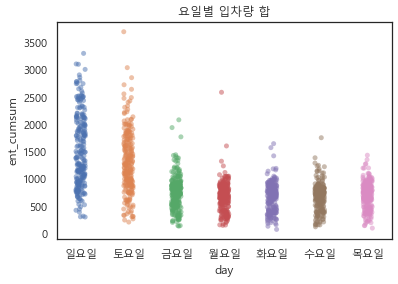

In [703]:
sns.stripplot(x="day", y="ent_cumsum", data=mon_sun, jitter=True,alpha = 0.5)
plt.title("요일별 입차량 합")
plt.show()

## 2. 버스 

In [75]:
oly = pd.read_csv('C:/Users/82104/Desktop/체육/올림픽공원 대관 데이터.csv',encoding='UTF-8')
oly

,DK_JS,DK_SS,DK_NAME,DK_BRIEF_NAME,EVENT_GUBUN,EVENT_NAME,RENT_START_YMD,RENT_END_YMD,DK_DAY,SIN_PERSON,JS_PERSON,PLAN_YN,IO_GUBUN
0,1,7,우리금융아트홀,제3체육관,체육행사,7330노인건강체조경연대회,20150917,20150917,1.0,550.0,NaN,NaN,내부
1,1,9,올림픽홀,올림픽홀,대중공연,"Hiphop PARYY - 딘, 크러시, 자이언티 / DJ. DOC, 코요테",20170418,20170422,4.0,8000.0,3800.0,N,내부
2,1,5,핸드볼경기장,핸드볼경기장,문화예술행사,2017 조항조 장윤정 첫번째 콘서트 - 서울공연,20170324,20170325,2.0,3000.0,NaN,N,내부
3,1,25,만남의광장,만남의광장,공공행사,2017서울국제마라톤대회,20170318,20170319,2.0,0.0,10000.0,N,외부
4,1,9,올림픽홀,올림픽홀,대중공연,나훈아콘서트,20171031,20171105,6.0,2900.0,8735.0,N,내부
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,1,33,88호수수변무대,88호수,문화예술행사,뷰티풀 민트 라이프 2022,20220510,20220515,6.0,5500.0,NaN,N,외부
3682,1,10,뮤즈라이브,뮤즈라이브,문화예술행사,2022 프렌쥬 시즌2 <신비의 손전등>,20220510,20220612,16.0,4560.0,NaN,Y,내부
3683,1,33,88호수수변무대,88호수,문화예술행사,뷰티풀 민트 라이프 2022,20220510,20220515,6.0,5500.0,NaN,NaN,외부
3684,1,9,올림픽홀,올림픽홀,문화예술행사,2022 오은영의 상담 콘서트,20220518,20220522,5.0,6000.0,NaN,Y,내부


In [76]:
oly['DK_NAME'].value_counts()

올림픽홀                962
핸드볼경기장              639
KSPO DOME(체조경기장)    638
우리금융아트홀             294
뮤즈라이브               202
핸드볼보조경기장            193
K-아트홀               160
평화의광장               106
88잔디마당               99
88호수수변무대             91
벨로드롬                 67
한얼광장                 45
올림픽컨벤션센터             42
우리금융아트홀 연습실          40
기타                   30
피크닉광장                26
만남의광장                19
몽촌해자수변무대A            12
올림픽수영장               10
몽촌해자수변무대B             5
촬영                    4
올림픽테니스장               1
K-아트홀 연습실             1
Name: DK_NAME, dtype: int64

### 중점적으로 공연이 발생하는 올림픽홀, 핸드볼 경기장, 체조 경기장을 기준으로 도보 20분 거리 이내의 버스 정류장으로 선정

In [41]:
bus_2022_01 = pd.read_csv('C:/Users/82104/Desktop/체육/2022_01.csv', encoding='cp949')
bus_2022_01

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자
0,202201,741,741번(진관차고지~헌인릉입구),100000001,1001,종로2가사거리,27,69,14,40,...,313,308,175,284,153,230,105,77,51,20220203
1,202201,N37,N37번(진관공영차고지~송파공영차고지),100000001,1001,종로2가사거리,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20220203
2,202201,470,470번(상암차고지~안골마을),100000001,1001,종로2가사거리,10,49,0,0,...,258,304,201,358,253,137,107,72,64,20220203
3,202201,N37,N37번(송파공영차고지~진관공영차고지),100000001,1001,종로2가사거리,0,5,31,89,...,0,0,0,0,0,0,0,0,0,20220203
4,202201,100,100번(하계동~용산구청),100000002,1002,창경궁.서울대학교병원,0,0,0,0,...,24,32,18,42,44,28,14,14,1,20220203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39154,202201,6648,6648(방화동~양천구청),999800002,~,김포교통(종점가상),0,0,0,0,...,0,0,1,0,0,0,2,0,0,20220203
39155,202201,9404,9404번(분당구미~신사역),999800003,~,구미동차고지(기점가상),0,0,0,0,...,1,3,3,1,6,0,11,0,0,20220203
39156,202201,9404,9404번(분당구미~신사역),999800004,~,구미동차고지(종점가상),0,1,0,3,...,3,0,3,0,8,0,10,0,3,20220203
39157,202201,9701,9701번(가좌동~서울역),999800005,~,가좌동종점(종점가상),0,2,0,0,...,0,0,1,0,1,0,3,0,1,20220203


## DataExplore

In [47]:
bus_2022_01[bus_2022_01['역명'].str.contains('올림픽선수촌아파트')]

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자
33530,202201,3412,3412번(강동공영차고지~강남역),123000157,24247,올림픽선수촌아파트,5,19,0,0,...,174,151,130,147,199,111,158,10,78,20220203
33531,202201,3413,3413번(강일동공영차고지~수서경찰서),123000157,24247,올림픽선수촌아파트,29,52,0,0,...,407,188,363,199,613,208,305,51,125,20220203
33532,202201,3220,3220번(오금동~청량리),123000157,24247,올림픽선수촌아파트,0,0,0,0,...,55,71,41,88,43,112,22,0,0,20220203
33533,202201,3319,3319(장지공영차고지~잠실역),123000157,24247,올림픽선수촌아파트,0,0,0,0,...,168,39,124,46,165,78,113,12,53,20220203
33534,202201,3214,3214번(마천동~강변역),123000157,24247,올림픽선수촌아파트,0,0,0,0,...,60,59,65,106,74,90,44,18,16,20220203


- 5개의 버스 

In [48]:
bus_2022_01[bus_2022_01['역명'].str.contains('올림픽공원역')]

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자
33518,202201,3412,3412번(강동공영차고지~강남역),123000154,24244,올림픽공원역,0,0,0,0,...,249,101,151,174,228,131,144,17,18,20220203
33519,202201,3413,3413번(강일동공영차고지~수서경찰서),123000154,24244,올림픽공원역,0,0,0,0,...,553,301,477,330,505,225,301,99,110,20220203
33520,202201,3220,3220번(오금동~청량리),123000154,24244,올림픽공원역,13,24,0,0,...,406,481,291,494,422,279,186,88,43,20220203
33521,202201,3319,3319(장지공영차고지~잠실역),123000154,24244,올림픽공원역,28,6,0,0,...,272,384,197,507,224,275,123,129,18,20220203
33522,202201,3214,3214번(마천동~강변역),123000154,24244,올림픽공원역,42,20,0,0,...,167,713,196,1025,253,701,155,264,92,20220203
33523,202201,3412,3412번(강동공영차고지~강남역),123000155,24245,올림픽공원역,32,16,0,0,...,99,403,108,580,174,338,63,142,22,20220203
33524,202201,3413,3413번(강일동공영차고지~수서경찰서),123000155,24245,올림픽공원역,73,22,1,0,...,234,632,288,1002,412,731,157,287,72,20220203
33525,202201,3220,3220번(오금동~청량리),123000155,24245,올림픽공원역,0,0,0,0,...,104,386,46,580,64,405,55,0,0,20220203
33526,202201,3214,3214번(마천동~강변역),123000155,24245,올림픽공원역,0,0,0,0,...,149,250,149,417,125,318,109,83,22,20220203
33527,202201,3319,3319(장지공영차고지~잠실역),123000155,24245,올림픽공원역,1,0,0,0,...,120,262,98,268,124,260,101,188,23,20220203


- 5개의 버스 정류장 위치 바꿔서 * 지도 참고

In [79]:
bus_2022_01[(bus_2022_01['역명']=='올림픽선수촌아파트') | (bus_2022_01['역명']=='올림픽공원역')]

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자
33518,202201,3412,3412번(강동공영차고지~강남역),123000154,24244,올림픽공원역,0,0,0,0,...,249,101,151,174,228,131,144,17,18,20220203
33519,202201,3413,3413번(강일동공영차고지~수서경찰서),123000154,24244,올림픽공원역,0,0,0,0,...,553,301,477,330,505,225,301,99,110,20220203
33520,202201,3220,3220번(오금동~청량리),123000154,24244,올림픽공원역,13,24,0,0,...,406,481,291,494,422,279,186,88,43,20220203
33521,202201,3319,3319(장지공영차고지~잠실역),123000154,24244,올림픽공원역,28,6,0,0,...,272,384,197,507,224,275,123,129,18,20220203
33522,202201,3214,3214번(마천동~강변역),123000154,24244,올림픽공원역,42,20,0,0,...,167,713,196,1025,253,701,155,264,92,20220203
33523,202201,3412,3412번(강동공영차고지~강남역),123000155,24245,올림픽공원역,32,16,0,0,...,99,403,108,580,174,338,63,142,22,20220203
33524,202201,3413,3413번(강일동공영차고지~수서경찰서),123000155,24245,올림픽공원역,73,22,1,0,...,234,632,288,1002,412,731,157,287,72,20220203
33525,202201,3220,3220번(오금동~청량리),123000155,24245,올림픽공원역,0,0,0,0,...,104,386,46,580,64,405,55,0,0,20220203
33526,202201,3214,3214번(마천동~강변역),123000155,24245,올림픽공원역,0,0,0,0,...,149,250,149,417,125,318,109,83,22,20220203
33527,202201,3319,3319(장지공영차고지~잠실역),123000155,24245,올림픽공원역,1,0,0,0,...,120,262,98,268,124,260,101,188,23,20220203


#### 월별 데이터는 시간별로 나누어있지만 , 일별 데이터가 존재하지 않아서 일별 데이터 사용해야함

#### 문제점: 지도상으로 조사했을 때 존재했던 공항버스 6500, 경기버스 30-5, 35의 데이터 셋이 존재하지 않음